<a href="https://colab.research.google.com/github/kennywong524/spotify-swipe-based-recommendation-system/blob/main/Spotify_songs_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Spotify songs dataset EDA**


# Data handling

In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('spotify_songs.csv')

# download data

In [3]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [4]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [7]:
# check for null values in the dataset
df.isnull().sum()
# a couple of null values in track_name, artists and album name

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
# create a function that takes in a dataframe and output a table with summary of missing values, null values etc.
def create_summary(df):
    # create a summ dataframe to store summary info
    summ = pd.DataFrame(df.dtypes, columns=['data type']) # show data type of df
    summ['#missing'] = df.isnull().sum().values #show number of missing values
    summ['#unique'] = df.nunique().values #show number of unique values
    desc = pd.DataFrame(df.describe(include='all').transpose()) #create descriptive statistics table and append to df
    summ['top'] = desc['top'].values
    summ['freq'] = desc['freq'].values
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    return summ.style.background_gradient(cmap='YlOrBr')

In [11]:
create_summary(df)

,data type,#missing,#unique,top,freq,min,max,average,standard_deviation
track_id,object,0,28356,7BKLCZ1jbUBVqRi2FVlTVw,10,nan,nan,nan,nan
track_name,object,5,23449,Poison,22,nan,nan,nan,nan
track_artist,object,5,10692,Martin Garrix,161,nan,nan,nan,nan
track_popularity,int64,0,101,nan,nan,0.000000,100.000000,42.477081,24.984074
track_album_id,object,0,22545,5L1xcowSxwzFUSJzvyMp48,42,nan,nan,nan,nan
track_album_name,object,5,19743,Greatest Hits,139,nan,nan,nan,nan
track_album_release_date,object,0,4530,2020-01-10,270,nan,nan,nan,nan
playlist_name,object,0,449,Indie Poptimism,308,nan,nan,nan,nan
playlist_id,object,0,471,4JkkvMpVl4lSioqQjeAL0q,247,nan,nan,nan,nan
playlist_genre,object,0,6,edm,6043,nan,nan,nan,nan


In [12]:
# create a copy of df to work with
df_working = deepcopy(df)

In [13]:
df_working[df_working['track_name'].isna()] #shows columns where track_name is null

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [18]:
# check if the track_id is unique or not; if it is not we will use the existing data to fill in the missing values
def check_track_id(track_id):
  return df_working[df_working['track_id'] == track_id]

In [19]:
check_track_id('69gRFGOWY9OMpFJgFol1u0')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.176,0.041,0.0,0.116,0.649,95.999,282707
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.176,0.041,0.0,0.116,0.649,95.999,282707


In [21]:
check_track_id('5cjecvX0CmC9gK0Laf5EMQ')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.319,0.0534,0.0,0.553,0.191,146.153,202235


In [22]:
check_track_id('5TTzhRSWQS4Yu8xTgAuq6D')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.307,0.0963,0.0,0.0888,0.505,86.839,206465


In [23]:
check_track_id('3VKFip3OdAvv4OfNTgFWeQ')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.103,0.726,97.017,252773


In [24]:
check_track_id('69gRFGOWY9OMpFJgFol1u0')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.176,0.041,0.0,0.116,0.649,95.999,282707
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.176,0.041,0.0,0.116,0.649,95.999,282707


As there are no other columns/id that do not have missing values, we will remove these samples from our data.



In [25]:
df_working.dropna(inplace=True)

In [26]:
df_working.isna().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [27]:
df_working

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# EDA & Data Visualization

Let's create a new DataFrame where each row corresponds to the most popular track for each unique track name in the original DataFrame df to effectively filter the DataFrame to include only the most popular track for each track name.

In [28]:
df_new = df_working.groupby('track_name', group_keys=False).apply(lambda x: x.loc[x['track_popularity'].idxmax()])
df_new

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,,,,,,,,,,,,,,,,,,,,,
"""I TRIED FOR YEARS... NOBODY LISTENED""",0WEI3cNqwQ1nyWYsBw3n7f,"""I TRIED FOR YEARS... NOBODY LISTENED""",Iceberg Black,18,33HL1PHasNglK2aUYwxG8f,WAR,2018-09-22,Rap Party 24/7 Radio / Gangsta Rap,4sGnz2x5tbHE2YlW1nemfb,rap,...,10,-6.712,0,0.1410,0.026800,0.001790,0.116,0.0944,140.026,150909
"""This Is Seagull….""",5jCOeqjJRnRo27b9Hb8xHp,"""This Is Seagull….""",The Snake Corps,34,60P4s9euug8W1iqDEYVKmL,Smother Earth,1990-01-01,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",2nRWtTI9a2LWjJ9Wy3JZs5,pop,...,9,-13.288,0,0.0295,0.000002,0.857000,0.110,0.2350,135.903,238227
#1 Stunna,7kBdenpTmgWfAz9clmBcok,#1 Stunna,Big Tymers,48,7pe02mW4PQwNJkrmSup7bu,I Got That Work,2000-01-01,Hip-Hop Drive,37i9dQZF1DWUFmyho2wkQU,rap,...,8,-4.961,1,0.2850,0.017600,0.003270,0.258,0.5610,89.017,281960
#NAKAMA,3PYjJW2UuhMUUP1TSF9NDD,#NAKAMA,XLII,26,2LGXdk4yoQZnnoBoxrj8iP,#NAKAMA,2019-12-25,Girl On Fire,37i9dQZF1DX4F2k37fMTyn,r&b,...,3,-3.204,1,0.0545,0.385000,0.000157,0.318,0.5680,108.041,192094
#Natural,3cRJo0hXMcrXa7oLfAUU4d,#Natural,Paty Cantú,50,6gi1JqZbK74yWCKTpiC022,#Natural,2017-10-20,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,0,-3.535,0,0.0568,0.114000,0.000000,0.134,0.8160,97.023,227013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
숙녀 (淑女) Lady,62pLjWF5RRPQg3mPCLDwf7,숙녀 (淑女) Lady,Yubin,17,340MUbVwBnwhqVACCdOSdj,都市女子,2018-06-05,Japanese Funk/Soul/NEO/Jazz/Acid,4zNayWuATXCAA9gaXvnFnq,r&b,...,9,-3.378,1,0.1700,0.234000,0.000051,0.400,0.8470,119.810,196093
쉼표,37Gq1KAg6bV3KAp32xOoFL,쉼표,Kozypop,30,6LHDppZ2sqbcy3uNub0duJ,"Seoul Vibes, Pt​. 4",2018-10-01,K-Crazy Michioso Tunes,37i9dQZF1DWUXxc8Mc6MmJ,edm,...,3,-4.144,0,0.2000,0.855000,0.000000,0.196,0.3770,82.199,150178
중독 Overdose,7MirWQBco3ZiuwvcdYaNSe,중독 Overdose,EXO-K,4,5P76th5WUjiqXxTYIgTXsG,The 2nd Mini Album '중독 Overdose',2014-08-06,K-Crazy Michioso Tunes,37i9dQZF1DWUXxc8Mc6MmJ,edm,...,5,-1.797,0,0.1640,0.061500,0.000000,0.358,0.6520,112.357,205612


In [29]:
# songs ranked by popularity
songs_popularity_ranked = df_new.sort_values(by='track_popularity', ascending=False)
songs_popularity_ranked

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,,,,,,,,,,,,,,,,,,,,,
Dance Monkey,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.513,98.027,209438
ROXANNE,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.457,116.735,163636
Circles,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280
Blinding Lights,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,-4.075,1,0.0629,0.001470,0.000209,0.0938,0.345,171.017,201573
Memories,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,11,-7.209,1,0.0546,0.837000,0.000000,0.0822,0.575,91.019,189486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upgraded,3hgFwotX5fCegIUb49jQem,Upgraded,Capital Kings,0,7C9DgxjL8vU2yjdZqhVMaz,II,2015-10-02,CHRISTIAN ELECTRO / DANCE / EDM,0MhTMIo1bgH6zzPh7BdChT,edm,...,5,-2.959,0,0.4330,0.340000,0.000001,0.0937,0.241,126.997,219547
Ipanema - Original Mix,3GveQQdwPjyAH7ML5fqw2k,Ipanema - Original Mix,Elio & Sylvester,0,2lU3zLAwnXwesTKKzYe7Hb,Ipanema,2014-09-02,Latin Village 2019,3JcJCsvBnRsA6oc7eUYDSB,latin,...,5,-5.885,0,0.0717,0.000685,0.912000,0.0868,0.611,126.994,291045
Invitation (feat. Yade Lauren),5t5e19EoXJGGt3l6XNnRgx,Invitation (feat. Yade Lauren),Yellow Claw,0,6Omn0WS6Cp0XFFeEtCoATT,Invitation (feat. Yade Lauren),2016-07-15,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,5,-5.612,0,0.0815,0.097800,0.000077,0.6440,0.591,103.921,152461


In [32]:
# Let's drop some repetitive & irrelevant columns
df_new_cleaned = df_new.drop(['track_name','track_id','playlist_id','track_album_id'], axis = 1)
# Change units from milliseconds to minutes
df_new_cleaned['duration_min'] = df_new['duration_ms'].apply(lambda x: x/60000)
df_new_cleaned

,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
track_name,,,,,,,,,,,,,,,,,,,,
"""I TRIED FOR YEARS... NOBODY LISTENED""",Iceberg Black,18,WAR,2018-09-22,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,0.914,0.408,10,-6.712,0,0.1410,0.026800,0.001790,0.116,0.0944,140.026,150909,2.515150
"""This Is Seagull….""",The Snake Corps,34,Smother Earth,1990-01-01,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,0.516,0.580,9,-13.288,0,0.0295,0.000002,0.857000,0.110,0.2350,135.903,238227,3.970450
#1 Stunna,Big Tymers,48,I Got That Work,2000-01-01,Hip-Hop Drive,rap,hip hop,0.552,0.842,8,-4.961,1,0.2850,0.017600,0.003270,0.258,0.5610,89.017,281960,4.699333
#NAKAMA,XLII,26,#NAKAMA,2019-12-25,Girl On Fire,r&b,hip pop,0.797,0.970,3,-3.204,1,0.0545,0.385000,0.000157,0.318,0.5680,108.041,192094,3.201567
#Natural,Paty Cantú,50,#Natural,2017-10-20,latin hip hop,latin,latin hip hop,0.800,0.836,0,-3.535,0,0.0568,0.114000,0.000000,0.134,0.8160,97.023,227013,3.783550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
숙녀 (淑女) Lady,Yubin,17,都市女子,2018-06-05,Japanese Funk/Soul/NEO/Jazz/Acid,r&b,neo soul,0.473,0.973,9,-3.378,1,0.1700,0.234000,0.000051,0.400,0.8470,119.810,196093,3.268217
쉼표,Kozypop,30,"Seoul Vibes, Pt​. 4",2018-10-01,K-Crazy Michioso Tunes,edm,pop edm,0.429,0.724,3,-4.144,0,0.2000,0.855000,0.000000,0.196,0.3770,82.199,150178,2.502967
중독 Overdose,EXO-K,4,The 2nd Mini Album '중독 Overdose',2014-08-06,K-Crazy Michioso Tunes,edm,pop edm,0.498,0.917,5,-1.797,0,0.1640,0.061500,0.000000,0.358,0.6520,112.357,205612,3.426867


In [33]:
# Top 10 most popular songs
df_popularity = df_new_cleaned.sort_values(by='track_popularity', ascending=False).head(10)
df_popularity

,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
track_name,,,,,,,,,,,,,,,,,,,,
Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.824,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438,3.490633
ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,latin,latin hip hop,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636,2.727267
Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,post-teen pop,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280,3.588000
Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,Todo Éxitos,pop,dance pop,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,3.359550
Memories,Maroon 5,98,Memories,2019-09-20,Todo Éxitos,pop,dance pop,0.764,0.320,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486,3.158100
Tusa,KAROL G,98,Tusa,2019-11-07,Todo Éxitos,pop,dance pop,0.803,0.715,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960,3.349333
The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,rap,hip hop,0.896,0.586,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653,3.277550
everything i wanted,Billie Eilish,97,everything i wanted,2019-11-13,Todo Éxitos,pop,dance pop,0.704,0.225,6,-14.454,0,0.0994,0.90200,0.657000,0.1060,0.243,120.006,245426,4.090433
Don't Start Now,Dua Lipa,97,Don't Start Now,2019-10-31,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,post-teen pop,0.794,0.793,11,-4.521,0,0.0842,0.01250,0.000000,0.0952,0.677,123.941,183290,3.054833


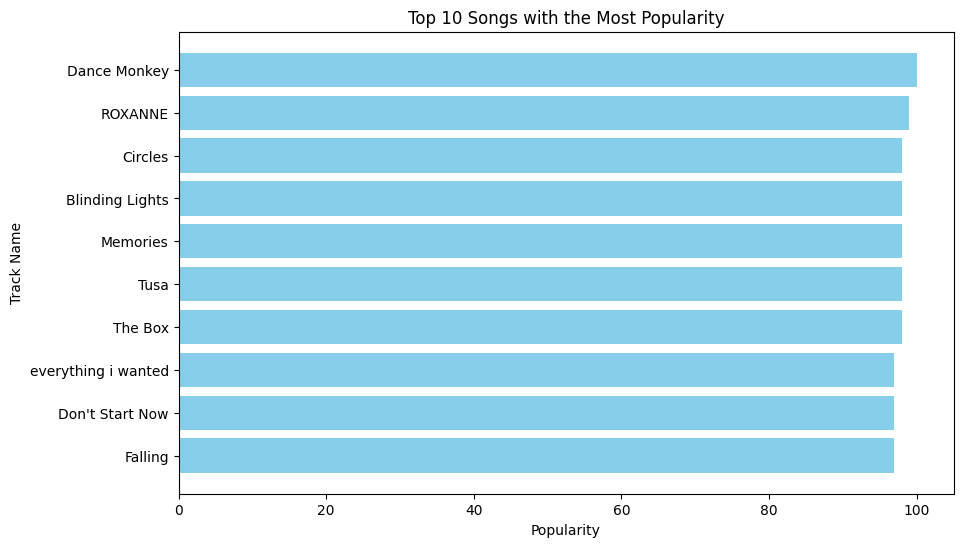

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(df_popularity.index, df_popularity['track_popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with the Most Popularity')
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular song at the top
plt.show()

In [36]:
# Top 10 fastest song
df_fast = df_new_cleaned.sort_values(by='tempo', ascending=False).head(10)
df_fast

,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
track_name,,,,,,,,,,,,,,,,,,,,
Dope's Gotta Hold On Me (feat. Ese Rich Roc),Spanish F.L.Y.,6,Trust No Man - Special Edition,2010-05-15,Chicano Rap,latin,latin hip hop,0.579,0.3610,7,-13.420,1,0.2870,0.11600,0.000023,0.1130,0.584,239.440,113817,1.896950
It's Only Time,Cabela and Schmitt,37,Just Another Face in the Cloud,2017-04-28,INDIE POP! TUNES,latin,latin pop,0.397,0.5750,5,-8.509,1,0.0407,0.02220,0.000070,0.1970,0.247,220.252,271789,4.529817
Long Island,Rob Stepwart,14,Trip Stories,2018-11-27,House Electro 2019,edm,electro house,0.556,0.7230,2,-6.049,1,0.0586,0.00119,0.887000,0.1870,0.223,219.961,115636,1.927267
Start Again (feat. Andrea Cormier),Pomo,28,The Other Day,2014-11-14,Groovy // Funky // Neo-Soul,r&b,neo soul,0.594,0.7910,7,-6.179,0,0.3320,0.02510,0.022400,0.0849,0.800,214.516,246355,4.105917
Permitame (feat. Yandel),Tony Dize,65,La Melodia de la Calle (Remastered),2009,Los Cangri,latin,latin hip hop,0.641,0.6740,8,-7.272,1,0.1830,0.01810,0.000000,0.1130,0.894,214.047,184507,3.075117
Permitame,Tony Dize,49,Latin Party,2012-01-01,REGGAETON VIEJO,latin,reggaeton,0.617,0.6600,8,-7.192,1,0.1710,0.03030,0.000000,0.1020,0.895,214.017,186987,3.116450
Warm Water - Snakehips Remix,BANKS,57,Warm Water (Snakehips Remix),2013-08-13,Indie Poptimism!,pop,indie poptimism,0.511,0.6780,4,-6.858,0,0.8690,0.24100,0.000000,0.0948,0.405,212.137,253585,4.226417
Machika,J Balvin,59,Machika,2018-01-19,Los Cangri,latin,latin hip hop,0.618,0.8360,9,-3.362,1,0.3790,0.04740,0.000000,0.1720,0.540,212.058,181733,3.028883
Rest Easy,Cozy Collective,47,"Cozy Waves, Vol. 2",2018-07-25,Lush Lofi,rap,hip hop,0.420,0.0881,4,-12.717,1,0.2930,0.84400,0.214000,0.1510,0.636,211.644,137195,2.286583


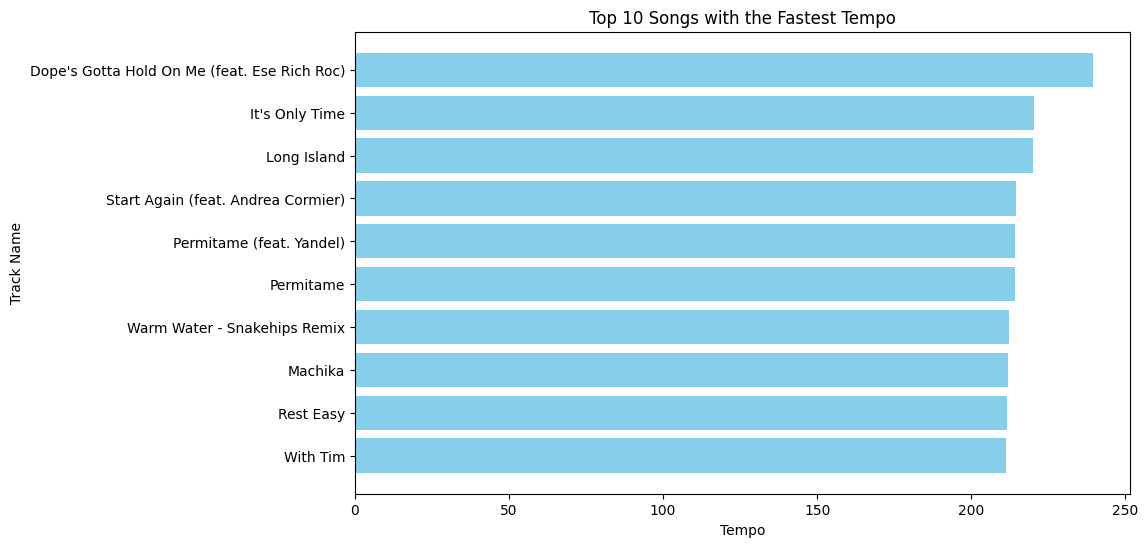

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(df_fast.index, df_fast['tempo'], color='skyblue')
plt.xlabel('Tempo')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with the Fastest Tempo')
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular song at the top
plt.show()

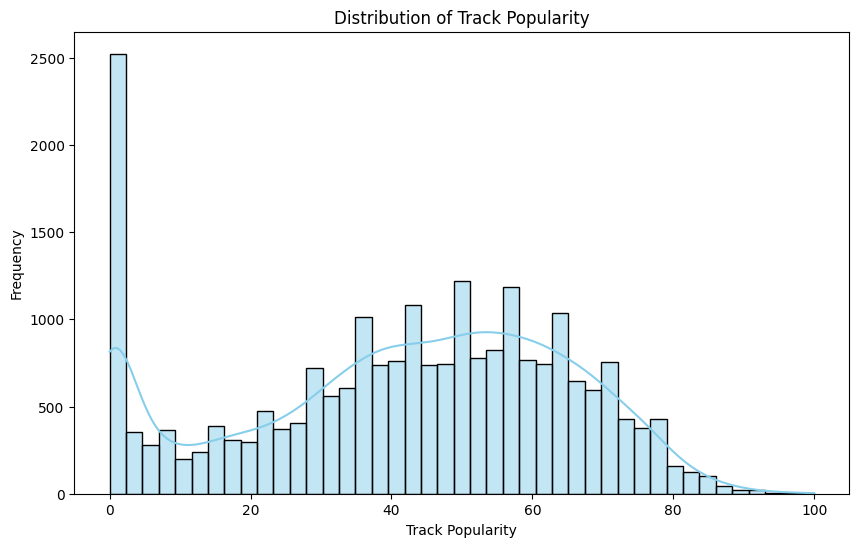

In [38]:
# Visualize Distribution of track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df_new_cleaned['track_popularity'], kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

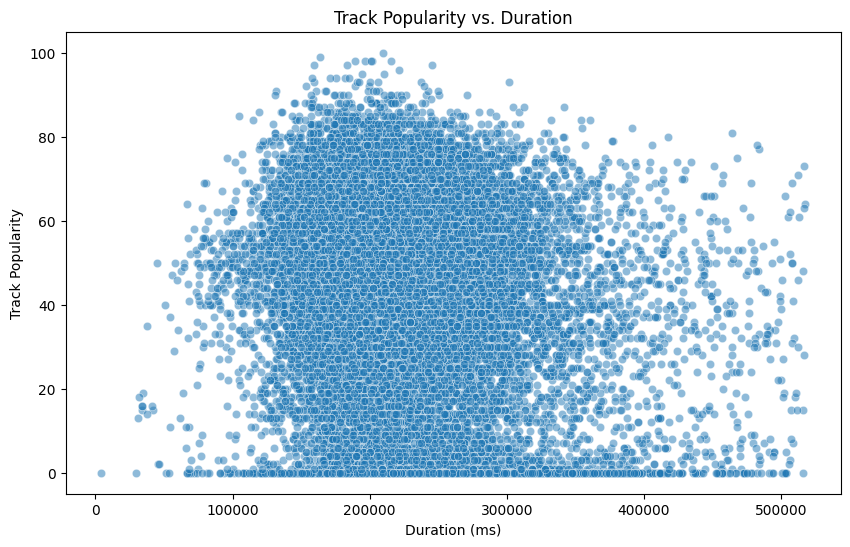

In [39]:
# Relationship between track popularity and another feature (e.g., duration_ms)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_ms', y='track_popularity', data=df_new_cleaned, alpha=0.5)
plt.title('Track Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Track Popularity')
plt.show()

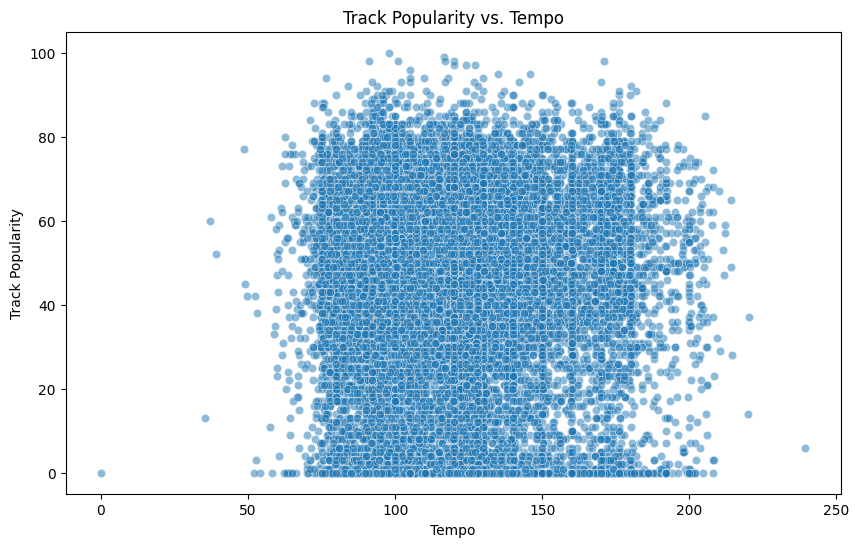

In [40]:
# Relationship between track popularity and another feature (e.g., tempo)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='track_popularity', data=df_new_cleaned, alpha=0.5)
plt.title('Track Popularity vs. Tempo')
plt.xlabel('Tempo')
plt.ylabel('Track Popularity')
plt.show()

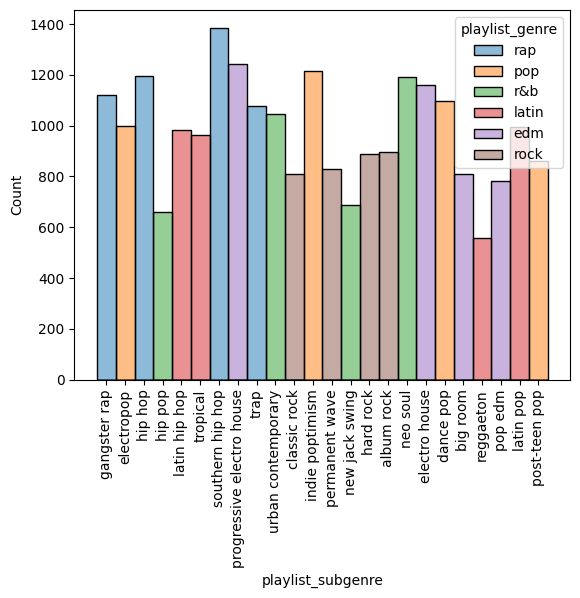

In [42]:
sns.histplot(df_new_cleaned, x='playlist_subgenre', hue='playlist_genre')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Popularity')

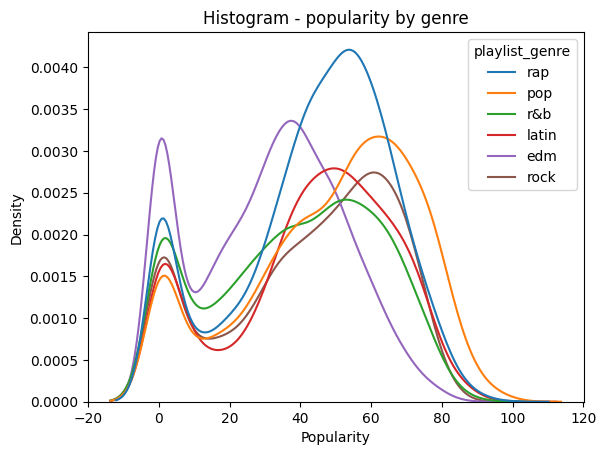

In [44]:
# Popularity by genre

sns.kdeplot(df_new_cleaned, x='track_popularity', hue='playlist_genre')
plt.title('Histogram - popularity by genre')
plt.xlabel('Popularity')

Text(0.5, 0, 'Danceability')

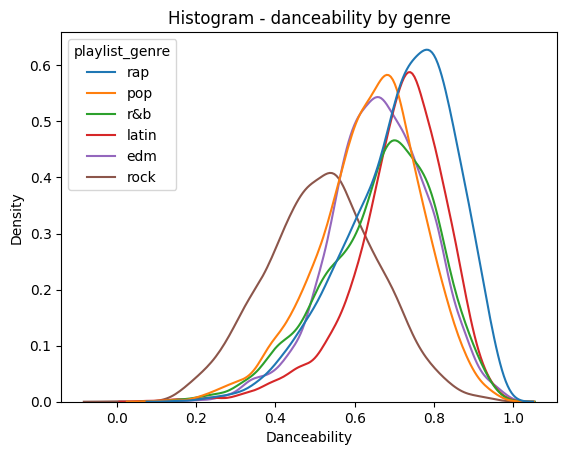

In [45]:
# Danceability by genre

sns.kdeplot(df_new_cleaned, x='danceability', hue='playlist_genre')
plt.title('Histogram - danceability by genre')
plt.xlabel('Danceability')

Text(0.5, 0, 'Duration')

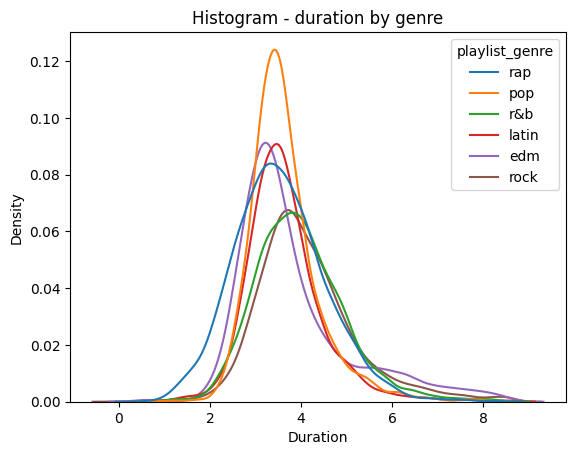

In [46]:
# duration by genre
sns.kdeplot(df_new_cleaned, x='duration_min', hue='playlist_genre')
plt.title('Histogram - duration by genre')
plt.xlabel('Duration')

In [49]:
# Calculate the correlation matrix
numeric_columns = df_new_cleaned.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_new_cleaned[numeric_columns].corr()
print(correlation_matrix)

                  track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.046815 -0.101965 -0.009370   
danceability              0.046815      1.000000 -0.070799  0.007808   
energy                   -0.101965     -0.070799  1.000000  0.010219   
key                      -0.009370      0.007808  0.010219  1.000000   
loudness                  0.044804      0.024365  0.683918 -0.002261   
mode                      0.026530     -0.053670 -0.007591 -0.176614   
speechiness               0.003124      0.184571 -0.030177  0.017756   
acousticness              0.086727     -0.041769 -0.548433  0.009425   
instrumentalness         -0.148112     -0.002446  0.010086  0.007582   
liveness                 -0.058815     -0.135595  0.166021  0.003987   
valence                   0.035320      0.332466  0.157448  0.019811   
tempo                     0.004346     -0.174311  0.150348 -0.009209   
duration_ms              -0.139214     -0.086438  0.027884  0.01

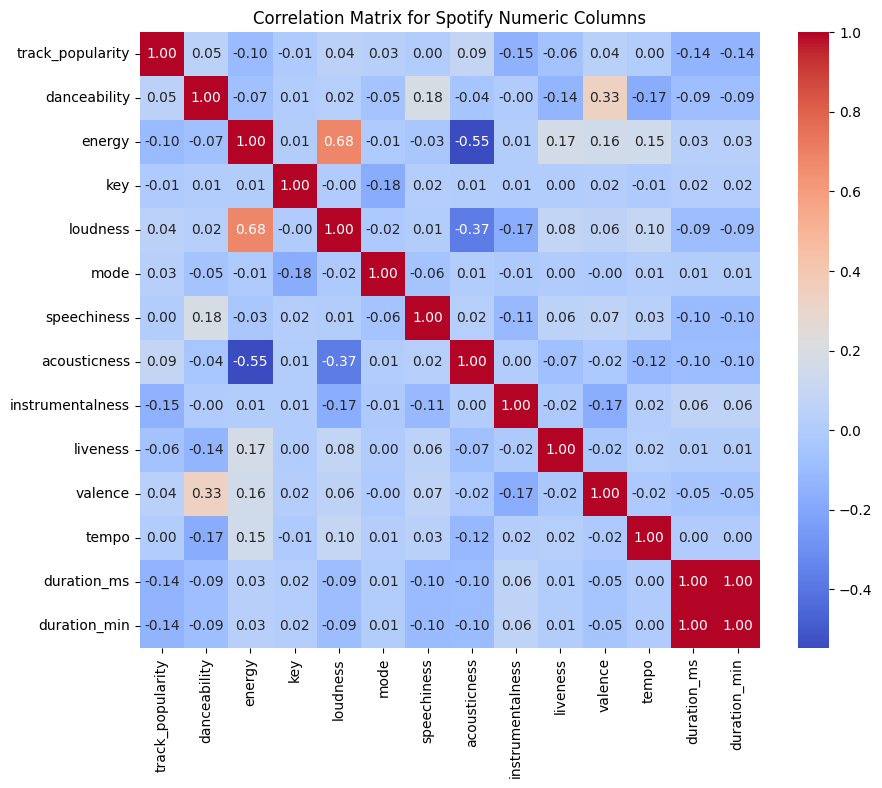

In [51]:
# generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Spotify Numeric Columns')
plt.show()

# Insights

**Track Popularity:**
track_popularity has a positive correlation with valence (0.33), suggesting that songs with higher valence (happiness or positivity) tend to be more popular.
It has a slight negative correlation with instrumentalness (-0.15) and duration_ms (-0.14), indicating that songs with less instrumental content and shorter durations are somewhat more popular.

**Danceability:**
danceability shows a moderate positive correlation with valence (0.33), meaning that happier songs are more danceable. It has a mild positive correlation with speechiness (0.18).

**Energy:**
energy is strongly positively correlated with loudness (0.68), indicating that louder songs tend to have higher energy levels. It has a moderate negative correlation with acousticness (-0.55), showing that energetic songs are generally less acoustic.

**Loudness:**
As noted, loudness is strongly positively correlated with energy (0.68). It has a moderate negative correlation with acousticness (-0.37), suggesting louder songs are less acoustic.

**Acousticness:**
acousticness shows a strong negative correlation with energy (-0.55) and loudness (-0.37).
It also has a moderate negative correlation with valence (-0.27), meaning that more acoustic songs tend to be less happy or positive.

**Valence:**
Besides its positive correlation with track_popularity (0.33) and danceability (0.33), valence has a moderate positive correlation with energy (0.17).
It has a moderate negative correlation with acousticness (-0.27).

**Tempo and Duration:**
tempo does not show strong correlations with any other features.
duration_ms and duration_min are perfectly correlated (1.00), which is expected since one is a direct transformation of the other.


# Application

1. Popular tracks tend to have higher valence (happiness or positivity). When recommending tracks, prioritize songs with higher valence scores, especially if the user enjoys popular music. This can enhance user satisfaction by suggesting tracks that are generally well-received and positively rated.

2. Happier songs are more danceable.If a user prefers danceable music, consider recommending tracks with higher valence. This will help in suggesting upbeat, dance-friendly tracks that align with the user’s preferences.

3. Energetic songs are typically louder.
For users who enjoy high-energy music, prioritize tracks with higher loudness and energy scores. This can be particularly useful for workout playlists or party settings where energetic music is desired.

4. Energetic songs are generally less acoustic. If a user likes acoustic music, consider recommending tracks with lower energy levels. Conversely, for users who prefer high-energy tracks, suggest less acoustic songs. This helps in tailoring the recommendations to the user's specific tastes.

5. Popular tracks tend to have shorter durations. When curating playlists, especially for general audiences, consider including tracks with shorter durations. This can keep the playlist engaging and maintain the listener's interest over time.

**Feature Prioritization:** Use the strong correlations identified (e.g., energy-loudness, valence-danceability) to create composite features or weight these features more heavily in the recommendation algorithms.
